# Metrics Visualization for Different Number of Rounds

In [1]:
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from analysis_util import load_and_extract_metrics

In [2]:
# Set Seaborn style and context
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 10))

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

In [3]:
# Define paths for different number of rounds
paths = {
    1: 'SimulationOutputs/num_rounds_1/metrics.json',
    3: 'SimulationOutputs/num_rounds_3/metrics.json',
    5: 'SimulationOutputs/num_rounds_5/metrics.json',
    10: 'SimulationOutputs/num_rounds_10/metrics.json',
    15: 'SimulationOutputs/num_rounds_15/metrics.json',
    20: 'SimulationOutputs/num_rounds_20/metrics.json'
}

In [4]:
# Load metrics for each number of rounds
num_rounds_metrics = {}
for num_rounds, path in paths.items():
    num_rounds_metrics[num_rounds] = load_and_extract_metrics(path)

In [5]:
# Prepare data for plotting
def prepare_metrics_dataframe(num_rounds_metrics, metric_type):
    """Prepare a long-format DataFrame for Seaborn plotting"""
    data = []
    for num_rounds, metrics in num_rounds_metrics.items():
        for round_num, accuracy in enumerate(metrics[metric_type]):
            data.append({
                'Num Rounds': num_rounds,
                'Round': round_num,
                'Accuracy': accuracy
            })
    return pd.DataFrame(data)

C:\Users\Noam Prinz\AppData\Local\Temp\ipykernel_49676\2544544687.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Noam Prinz\AppData\Local\Temp\ipykernel_49676\2544544687.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Noam Prinz\AppData\Local\Temp\ipykernel_49676\2544544687.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Noam Prinz\AppData\Local\Temp\ipykernel_49676\2544544687.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called w

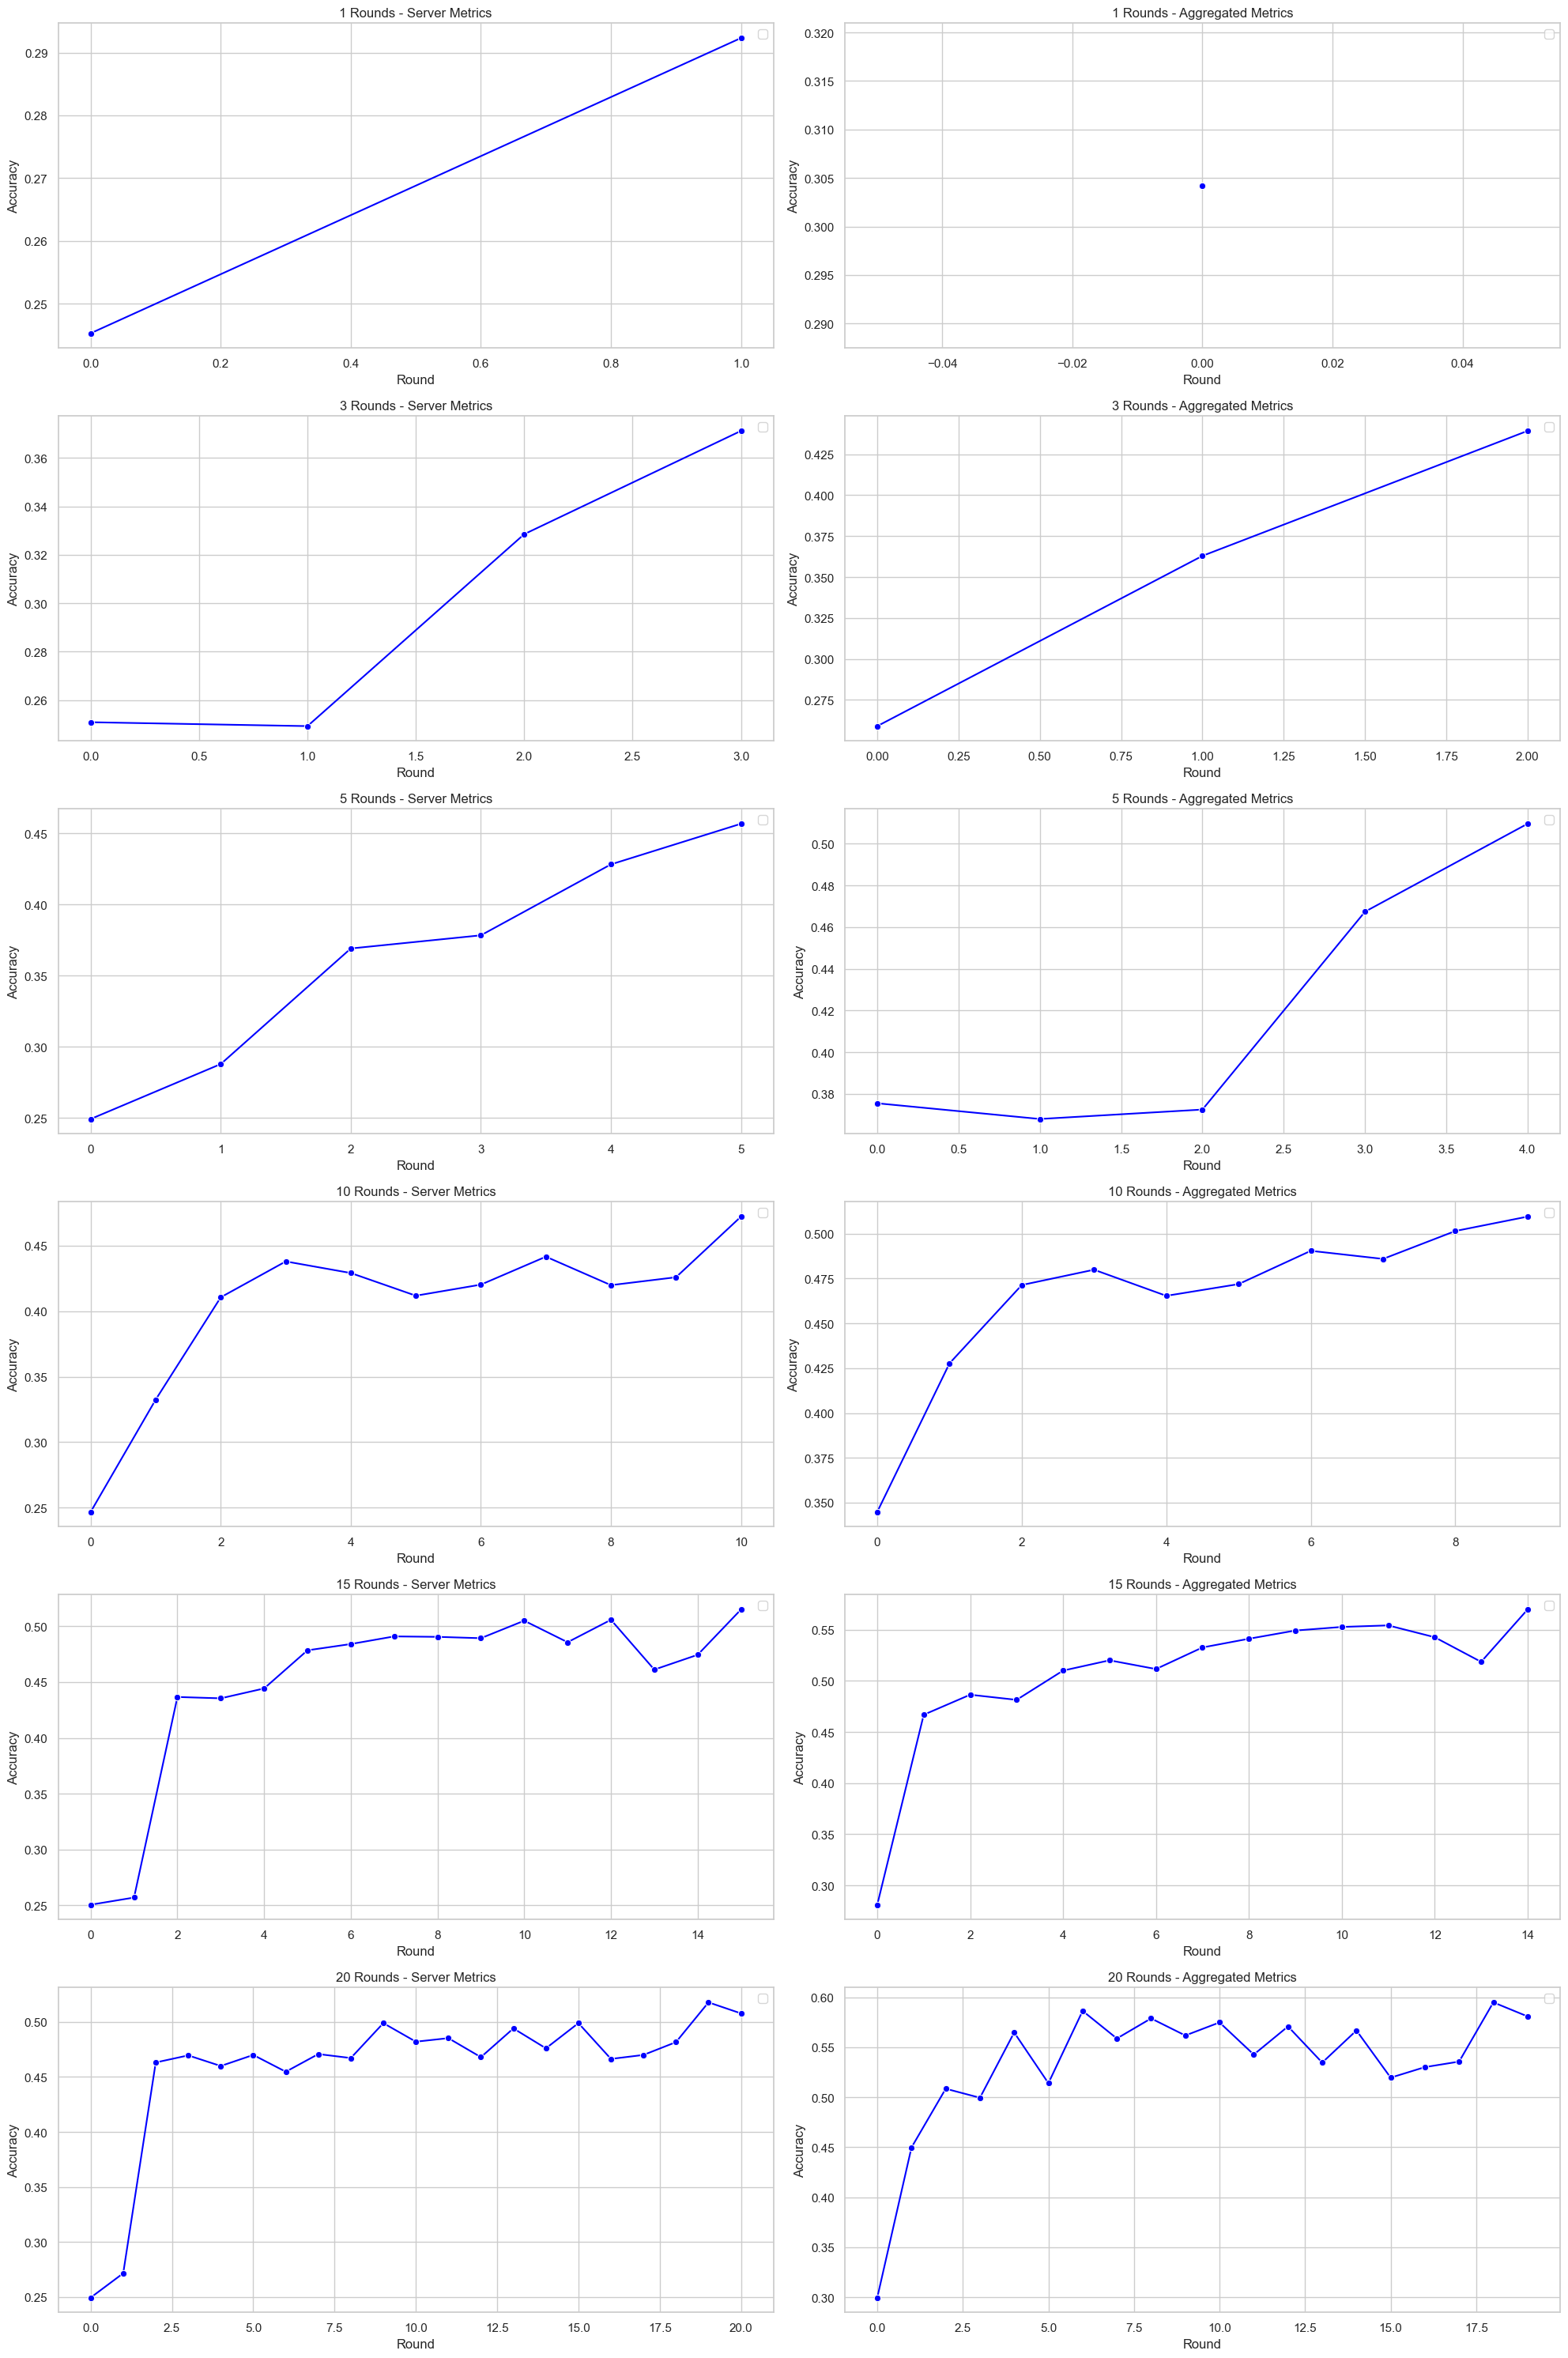

In [6]:
# Visualization 1: 6x2 Subplots Grid with Seaborn
plt.figure(figsize=(20, 30))

metric_types = ['server_metrics', 'aggregated_metrics']
metric_names = ['Server Metrics', 'Aggregated Metrics']

for i, (metric_type, metric_name) in enumerate(zip(metric_types, metric_names)):
    df = prepare_metrics_dataframe(num_rounds_metrics, metric_type)
    
    for j, num_rounds in enumerate(sorted(num_rounds_metrics.keys())):
        plt.subplot(6, 2, 2*j + i + 1)
        subset = df[df['Num Rounds'] == num_rounds]
        sns.lineplot(data=subset, x='Round', y='Accuracy', marker='o', color='blue')
        plt.title(f'{num_rounds} Rounds - {metric_name}')
        plt.xlabel('Round')
        plt.ylabel('Accuracy')
        plt.legend()

plt.tight_layout()
plt.show()

C:\Users\Noam Prinz\AppData\Local\Temp\ipykernel_49676\2903099161.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Noam Prinz\AppData\Local\Temp\ipykernel_49676\2903099161.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


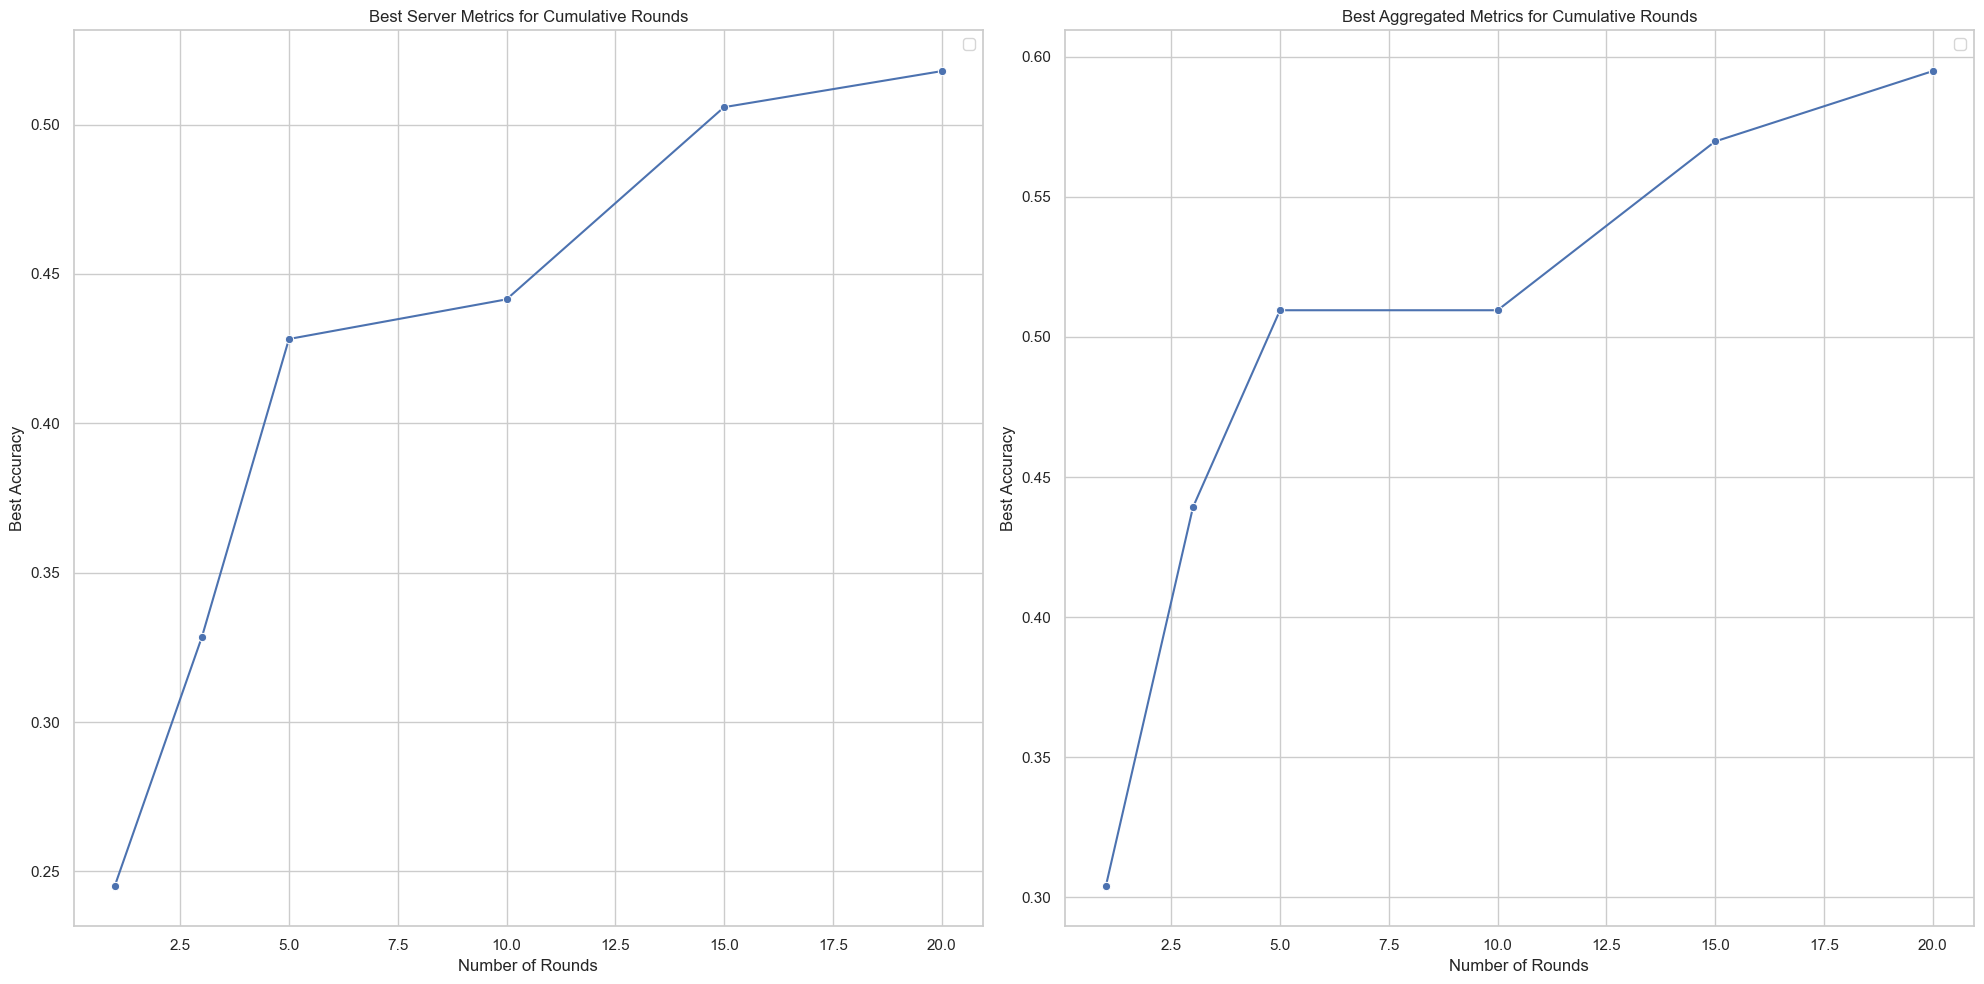

In [7]:
# Visualization 2: Cumulative Best Metrics Comparison
num_rounds_list = [1, 3, 5, 10, 15, 20]
best_cumulative_metrics = {
    'Num Rounds': num_rounds_list,
    'Server Best Cumulative Metrics': [],
    'Aggregated Best Cumulative Metrics': []
}

for num_rounds in num_rounds_list:
    server_best = max(num_rounds_metrics[num_rounds]['server_metrics'][:num_rounds])
    aggregated_best = max(num_rounds_metrics[num_rounds]['aggregated_metrics'][:num_rounds])
    
    best_cumulative_metrics['Server Best Cumulative Metrics'].append(server_best)
    best_cumulative_metrics['Aggregated Best Cumulative Metrics'].append(aggregated_best)

best_cumulative_df = pd.DataFrame(best_cumulative_metrics)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.lineplot(data=best_cumulative_df, x='Num Rounds', y='Server Best Cumulative Metrics', marker='o')
plt.title('Best Server Metrics for Cumulative Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Best Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
sns.lineplot(data=best_cumulative_df, x='Num Rounds', y='Aggregated Best Cumulative Metrics', marker='o')
plt.title('Best Aggregated Metrics for Cumulative Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Best Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\Noam Prinz\AppData\Local\Temp\ipykernel_49676\1057927340.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Noam Prinz\AppData\Local\Temp\ipykernel_49676\1057927340.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


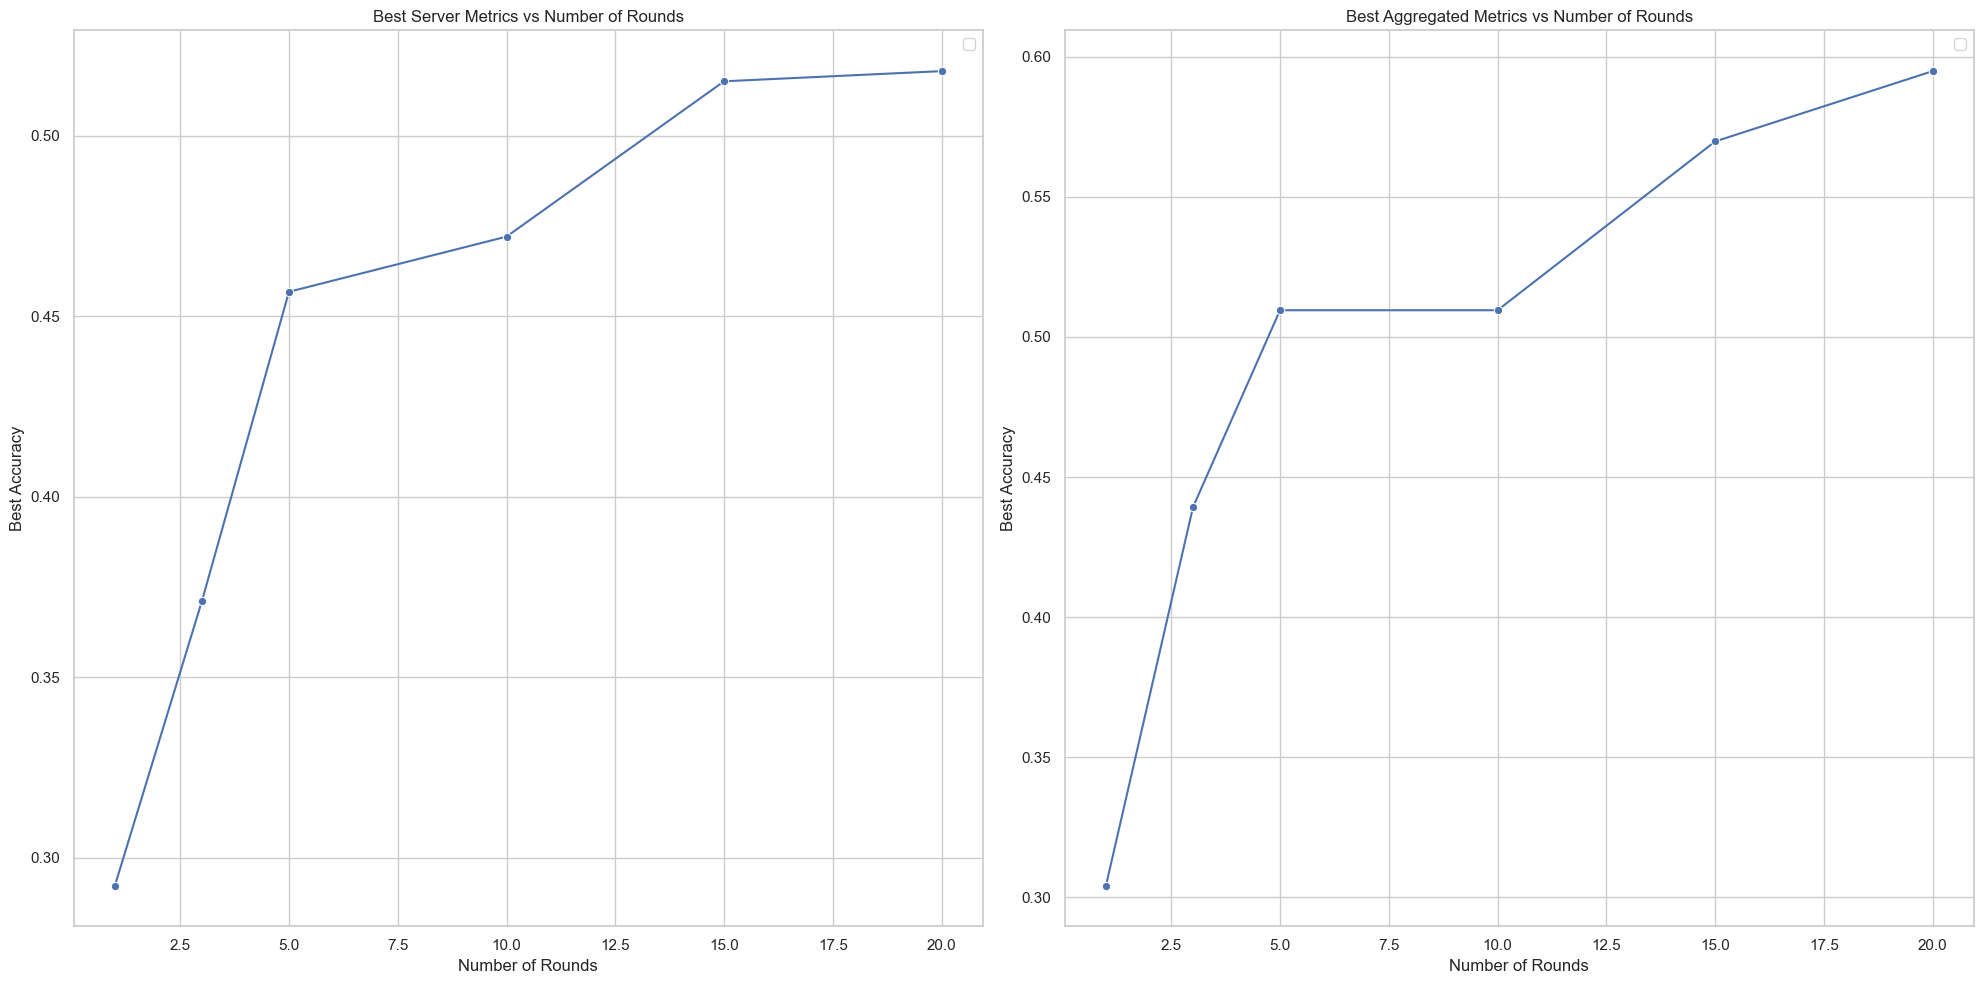

In [8]:
# Visualization 3: Best Metrics as Function of Rounds
best_metrics = {
    'Num Rounds': list(num_rounds_metrics.keys()),
    'Server Best Metrics': [metrics['best_server_metric'] for metrics in num_rounds_metrics.values()],
    'Aggregated Best Metrics': [metrics['best_aggregated_metric'] for metrics in num_rounds_metrics.values()]
}

best_metrics_df = pd.DataFrame(best_metrics)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.lineplot(data=best_metrics_df, x='Num Rounds', y='Server Best Metrics', marker='o')
plt.title('Best Server Metrics vs Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Best Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
sns.lineplot(data=best_metrics_df, x='Num Rounds', y='Aggregated Best Metrics', marker='o')
plt.title('Best Aggregated Metrics vs Number of Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Best Accuracy')
plt.legend()

plt.tight_layout()
plt.show()